## **INTRODUCTION**

##**The Indian Premier League (IPL) is a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. The IPL is the most-attended cricket league in the world and the brand value of the IPL in 2019 was Rs.475 billion (US$6.7 billion)**

In [173]:
# Importing IMportant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [174]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (5,3)

In [175]:
matches_df = pd.read_csv('/content/sample_data/IPL Matches 2008-2020.csv')
balls_df = pd.read_csv('/content/sample_data/IPL Ball-by-Ball 2008-2020.csv')

#**📊 Insights:**

1. Matches Played per Season

    IPL seasons have varied slightly in the number of matches.

    Some seasons like 2011 and 2013 had a larger number of matches.

2. Total Wins by Team

    Mumbai Indians lead in total wins, followed by Chennai Super Kings and Kolkata Knight Riders.

3. Toss Decisions

    Teams have preferred fielding first more often than batting first.

4. Top Venues

    Eden Gardens, Wankhede Stadium, and M. Chinnaswamy are among the most frequently used venues.

In [176]:
# Practice :  To check filter unique city when venue is Dubai International Cricket Stadium.
matches_df['city'][matches_df['venue']=='Dubai International Cricket Stadium'].unique()

array([nan, 'Dubai'], dtype=object)

In [177]:
# Preprocessing identify all null columns in matches_df and balls_df
print("Matches Data Frame: ")
print(matches_df.isnull().sum()[matches_df.isnull().sum() > 0])
print("\n\n Balls Data Frame: ")
print(balls_df.isnull().sum()[balls_df.isnull().sum() > 0])

Matches Data Frame: 
city                13
player_of_match      4
winner               4
result               4
result_margin       17
eliminator           4
method             797
dtype: int64


 Balls Data Frame: 
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
bowling_team           191
dtype: int64


In [178]:
# Cleanup Balls Data Frame
balls_df['dismissal_kind'].fillna('No Dismissal Kind', inplace=True)
balls_df['player_dismissed'].fillna('No Player Dismissed', inplace=True)
balls_df['fielder'].fillna('No Fielder', inplace=True)
balls_df['extras_type'].fillna('No Extra', inplace=True)
balls_df['bowling_team'].fillna('Unknown Bowling Team', inplace=True)

print("\n\n Balls Data Frame: ")
print(balls_df.isnull().sum())



 Balls Data Frame: 
id                  0
inning              0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
batsman_runs        0
extra_runs          0
total_runs          0
non_boundary        0
is_wicket           0
dismissal_kind      0
player_dismissed    0
fielder             0
extras_type         0
batting_team        0
bowling_team        0
dtype: int64


In [179]:
# When match result is No result then values off result Margin, Winner, player of the match and Eliminator all will be null


# Convert the 'date' column to datetime format
matches_df['date'] = pd.to_datetime(matches_df['date'])

# Extract the season (year) from the date
matches_df['season'] = matches_df['date'].dt.year

matches_df['result'].fillna('No Result', inplace=True)

no_result_mask = matches_df['result'] == 'No Result'


# Fill missing values when match result is "No Result"
matches_df.loc[no_result_mask, 'result_margin'] = matches_df.loc[no_result_mask, 'result_margin'].fillna('No Result')
matches_df.loc[no_result_mask, 'winner'] = matches_df.loc[no_result_mask, 'winner'].fillna('No Winner')
matches_df.loc[no_result_mask, 'player_of_match'] = matches_df.loc[no_result_mask, 'player_of_match'].fillna('No Player of the Match')
matches_df.loc[no_result_mask, 'eliminator'] = matches_df.loc[no_result_mask, 'eliminator'].fillna('No Eliminator')

# Create a mask for rows where eliminator is 'Y' and result_margin is null
eliminator_mask = (matches_df['eliminator'] == 'Y') & (matches_df['result_margin'].isnull())

# Fill result_margin with the corresponding result where the condition is met
matches_df.loc[eliminator_mask, 'result_margin'] = matches_df.loc[eliminator_mask, 'result']

# Build mapping dictionary for city column
venue_city_mapping = matches_df.dropna(subset=['city']).drop_duplicates('venue').set_index('venue')['city'].to_dict()

# Fill missing cities using map
matches_df['city'] = matches_df['city'].fillna(matches_df['venue'].map(venue_city_mapping))

# Verify if all nulls in city are filled
print(matches_df['city'].isnull().sum())

# Fill all null values in the 'method' column with a default value "No Methods"
matches_df['method'].fillna('No Methods', inplace=True)

print("\n\n Matches Data Frame: ")
print(matches_df.isnull().sum())

0


 Matches Data Frame: 
id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
method             0
umpire1            0
umpire2            0
season             0
dtype: int64


In [180]:
# Check City and Venue
matches_df[['city', 'venue']].drop_duplicates().sort_values(by ="city")

,city,venue
398,Abu Dhabi,Sheikh Zayed Stadium
120,Ahmedabad,"Sardar Patel Stadium, Motera"
0,Bangalore,M Chinnaswamy Stadium
581,Bengaluru,M.Chinnaswamy Stadium
101,Bloemfontein,OUTsurance Oval
58,Cape Town,Newlands
73,Centurion,SuperSport Park
1,Chandigarh,"Punjab Cricket Association Stadium, Mohali"
519,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ..."
7,Chennai,"MA Chidambaram Stadium, Chepauk"


In [181]:
# Question 1 -> What was the count of matches played in each season?

# Get match count per season
matches_per_season = matches_df['season'].value_counts().sort_index()

#matches_per_season.head(15)
print("Number of matches played in each season:")
print(matches_per_season)


Number of matches played in each season:
season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64


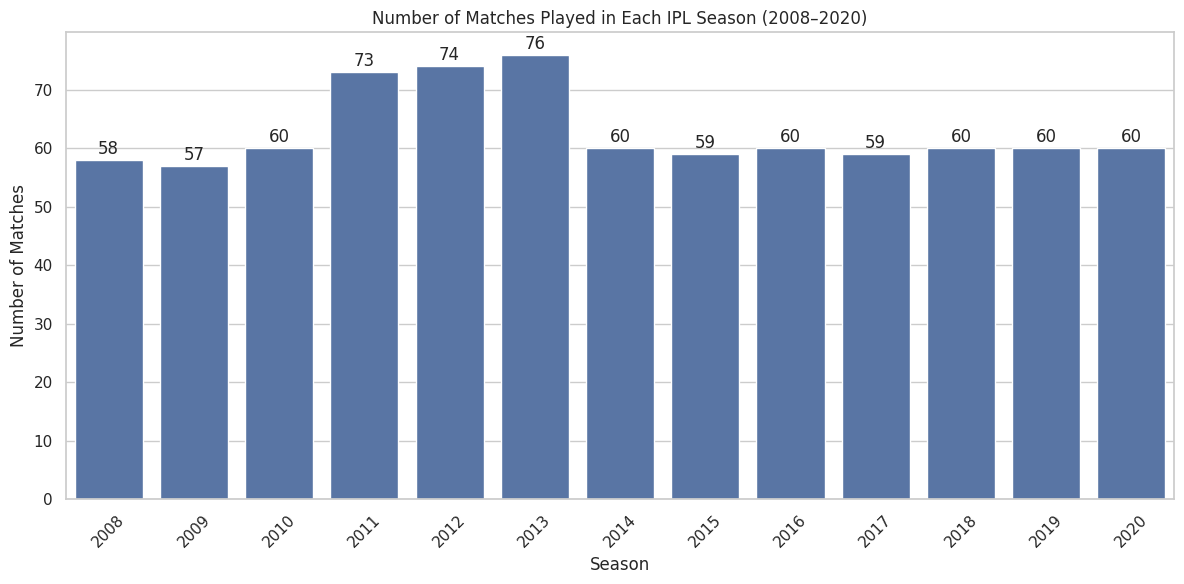

In [258]:
# Visualization 1
# Plot using seaborn
# Set plot style
sns.set(style="whitegrid")

# Bar plot of matches per season
plt.figure(figsize=(12, 6))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values)

# Add labels
for i, value in enumerate(matches_per_season.values):
    plt.text(i, value + 1 , str(value), ha='center')

# Add labels and title
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.title("Number of Matches Played in Each IPL Season (2008–2020)")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [183]:
# Question 2 How many runs were scored in each season?

In [184]:
# Merge ball-by-ball data with match data to get season
merged_dfballs_with_season = balls_df.merge(matches_df[['id', 'season']], on='id')

# Group by season and calculate total runs
runs_per_season = merged_dfballs_with_season.groupby('season')['total_runs'].sum().sort_index()

# Display the result
print("Total runs scored in each season:")
print(runs_per_season)

Total runs scored in each season:
season
2008    17937
2009    16320
2010    18864
2011    21154
2012    22453
2013    22541
2014    18909
2015    18332
2016    18862
2017    18769
2018    19901
2019    19400
2020    19352
Name: total_runs, dtype: int64


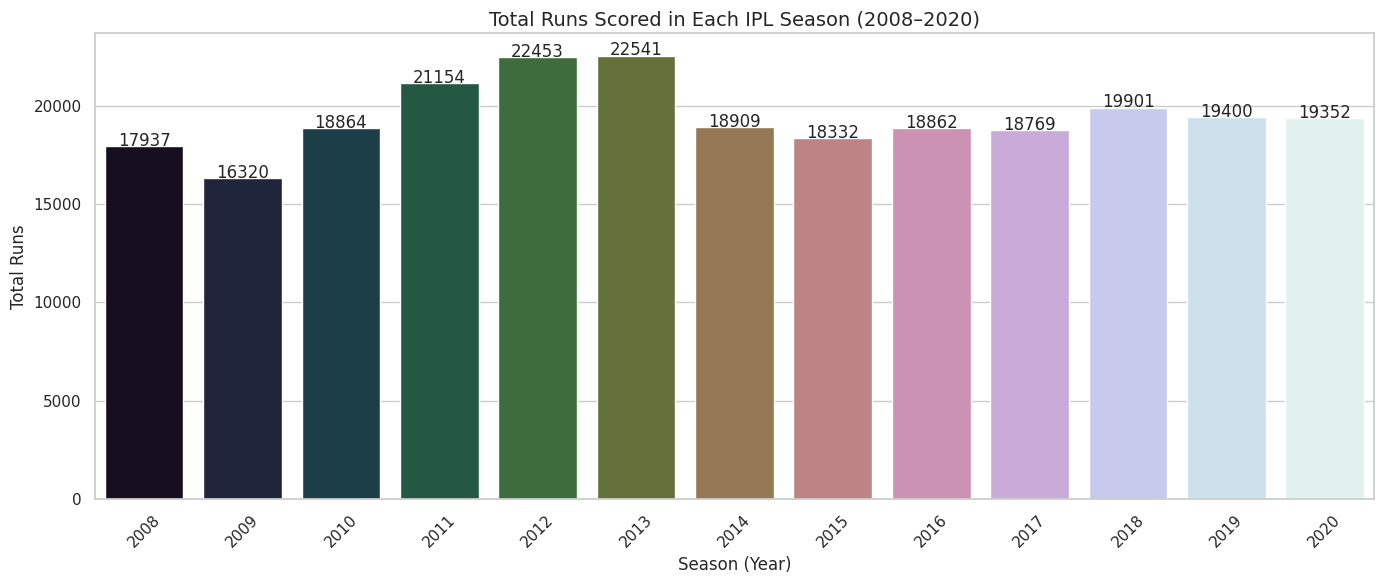

In [268]:
# Assuming 'runs_per_season' is already calculated as a pandas Series
plt.figure(figsize=(14, 6))
sns.barplot(x=runs_per_season.index, y=runs_per_season.values, palette="cubehelix")

# Add labels
for i, value in enumerate(runs_per_season.values):
    plt.text(i, value +2 , str(value), ha='center')

plt.title('Total Runs Scored in Each IPL Season (2008–2020)', fontsize=14)
plt.xlabel('Season (Year)', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [186]:
# Question 3 - What were the runs scored per match in different seasons?

In [187]:
avg_runs_per_match = (runs_per_season / matches_per_season).round(2)
print("\nQuestion 3: Average runs per match per season")
print(avg_runs_per_match)


Question 3: Average runs per match per season
season
2008    309.26
2009    286.32
2010    314.40
2011    289.78
2012    303.42
2013    296.59
2014    315.15
2015    310.71
2016    314.37
2017    318.12
2018    331.68
2019    323.33
2020    322.53
dtype: float64


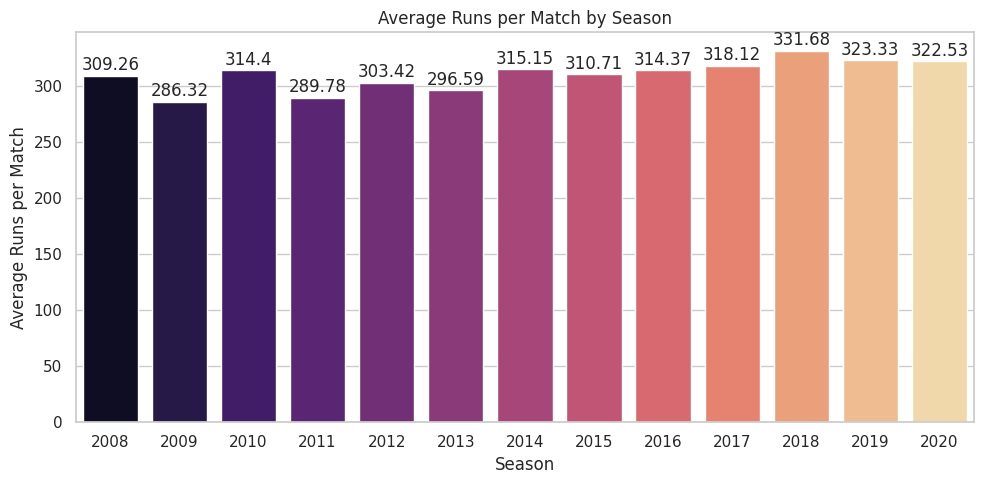

In [271]:
# Visualization
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_runs_per_match.index, y=avg_runs_per_match.values, palette='magma')

# Add labels
for i, value in enumerate(avg_runs_per_match.values):
    plt.text(i, value + 5 , str(value), ha='center')
plt.title("Average Runs per Match by Season")
plt.xlabel("Season")
plt.ylabel("Average Runs per Match")
plt.tight_layout()
plt.show()

In [189]:
# Question 4 - Who has umpired the most?

In [274]:
# Combine umpire columns into one series
umpires = pd.concat([
    matches_df['umpire1'],
    matches_df['umpire2']])

# Drop missing values and count occurrences
umpire_counts = umpires.dropna().value_counts()

umpire_counts.head(1)

,count
S Ravi,121


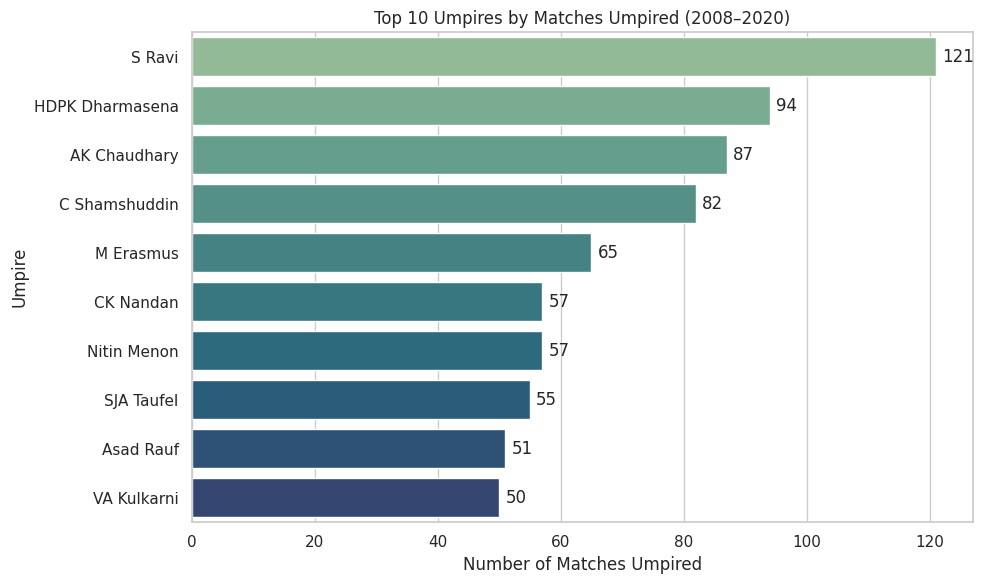

In [191]:
# Visualize
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=umpire_counts.head(10).values, y=umpire_counts.head(10).index, palette='crest')

# Add labels to each bar
for i, value in enumerate(umpire_counts.head(10).values):
    ax.text(value + 1, i, str(value), va='center')  # +1 shifts label slightly right

plt.xlabel("Number of Matches Umpired")
plt.ylabel("Umpire")
plt.title("Top 10 Umpires by Matches Umpired (2008–2020)")
plt.tight_layout()
plt.show()

In [192]:
# Question 5	Which team has won the most tosses?

In [193]:
# Count toss wins per team
toss_wins = matches_df['toss_winner'].value_counts()

# Team with the most toss wins
top_toss_winner = toss_wins.idxmax()
top_toss_count = toss_wins.max()

print(f"{top_toss_winner} has won the most tosses with {top_toss_count} toss wins.")

Mumbai Indians has won the most tosses with 106 toss wins.


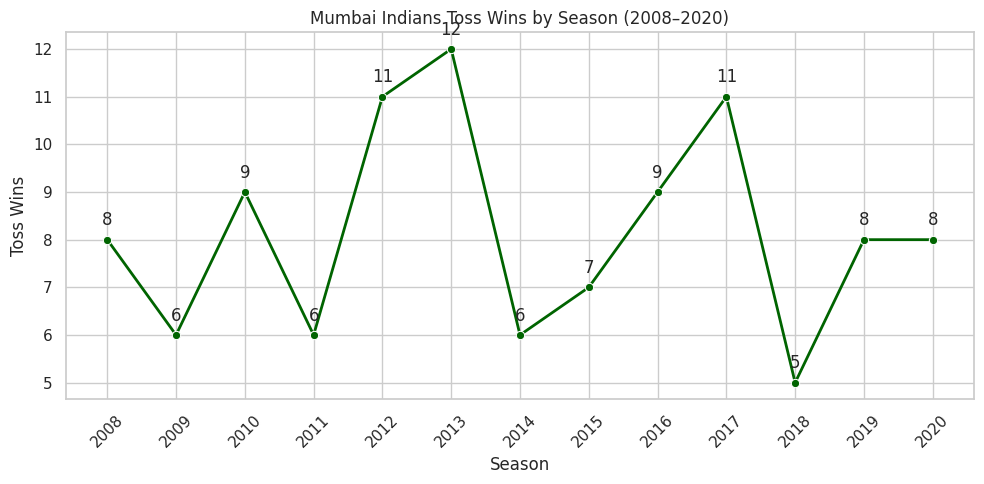

In [194]:
# Step 2: Filter matches where that team won the toss
top_team_toss_wins = matches_df[matches_df['toss_winner'] == top_toss_winner]

# Step 3: Count toss wins by season
top_team_toss_trend = top_team_toss_wins['season'].value_counts().sort_index()

# Step 4: Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=top_team_toss_trend.index, y=top_team_toss_trend.values, marker='o', linewidth=2, color='darkgreen')

# Add labels
for x, y in zip(top_team_toss_trend.index, top_team_toss_trend.values):
    plt.text(x, y + 0.3, str(y), ha='center')

# Final touches
plt.title(f"{top_toss_winner} Toss Wins by Season (2008–2020)")
plt.xlabel("Season")
plt.ylabel("Toss Wins")
plt.xticks(top_team_toss_trend.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [195]:
# Question 6 What does the team decide after winning the toss?

In [196]:
# Count decisions made after winning the toss
toss_decisions = matches_df['toss_decision'].value_counts()

# Print results
print("Toss Decisions:")
print(toss_decisions)

Toss Decisions:
toss_decision
field    496
bat      320
Name: count, dtype: int64


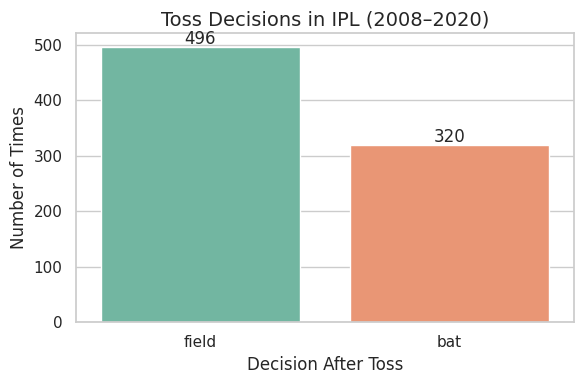

In [197]:
# Visualization
# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=toss_decisions.index, y=toss_decisions.values, palette='Set2')

# Add labels
for i, value in enumerate(toss_decisions.values):
    plt.text(i, value + 5, str(value), ha='center')

plt.title('Toss Decisions in IPL (2008–2020)', fontsize=14)
plt.xlabel('Decision After Toss', fontsize=12)
plt.ylabel('Number of Times', fontsize=12)
plt.tight_layout()
plt.show()

In [198]:
# Question 7 How does the toss decision vary across seasons?

“#**🎯 Objective:**

We want to see **how often teams chose to bat or field** after winning the toss, **for each season**.

**✅ Strategy:**
1. Group by `season` and `toss_decision`
2. Count the decisions per season
3. Plot as a grouped bar chart”

In [199]:
# Group by season and toss decision
toss_by_season = matches_df.groupby(['season', 'toss_decision']).size().unstack().fillna(0)

toss_by_season.head(20)

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,19,41
2015,25,34
2016,11,49


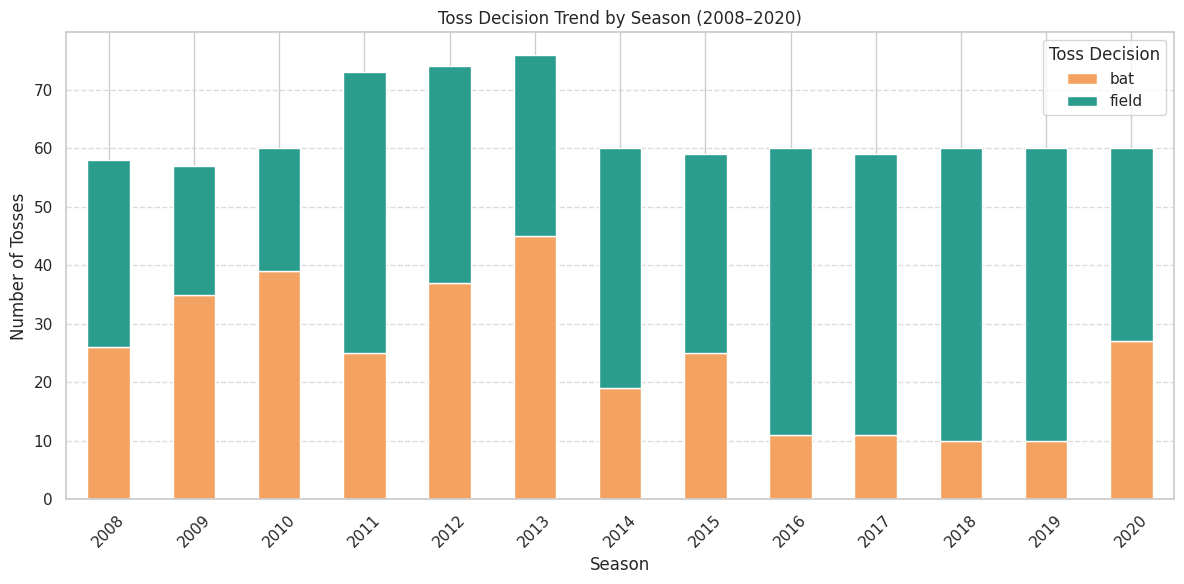

In [272]:
# Plot
toss_by_season.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#f4a261', '#2a9d8f'])
#toss_by_season.plot(kind = 'bar', stacked = True, colormap = 'Set2')
# Add labels and title
plt.title("Toss Decision Trend by Season (2008–2020)")

plt.xlabel("Season")
plt.ylabel("Number of Tosses")
plt.xticks(rotation=45)
plt.legend(title="Toss Decision")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

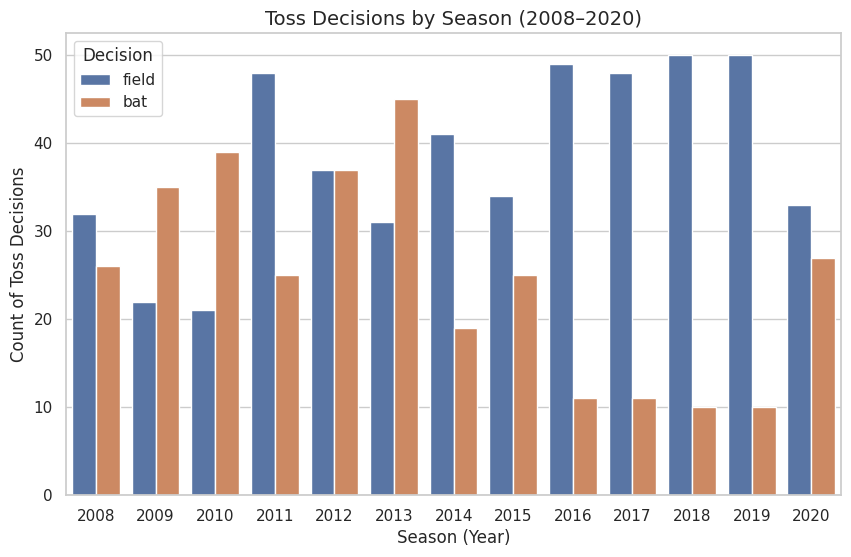

In [201]:
plt.figure(figsize=(10, 6))
sns.countplot(data=matches_df, x='season', hue='toss_decision')
plt.title('Toss Decisions by Season (2008–2020)', fontsize=14)
plt.xlabel('Season (Year)', fontsize=12)
plt.ylabel('Count of Toss Decisions', fontsize=12)
plt.legend(title='Decision')


In [202]:
# Question 8 Does winning the toss imply winning the game?

#**🧮 Steps:**

1. Compare toss_winner with winner for each match.

2. Count:

    Matches where toss winner == match winner ✅

    Matches where toss winner ≠ match winner ❌

3. Calculate and visualize the percentages.

In [203]:
# Total matches where toss_winner == winner
matches_df['toss_winner_won'] = (matches_df['toss_winner'] == matches_df['winner']).astype(int)

toss_and_match_wins = round(matches_df['toss_winner_won'].mean(),4)


# Total matches with a declared winner (exclude ties/no results)
total_decided_matches = (matches_df['winner']!= 'No Winner').sum()

# Calculate percentage
win_percentage = round(toss_and_match_wins * 100, 2)

# Output
print(f'Matches where toss winner also won the match: {toss_and_match_wins}')
print(f'Total decided matches: {total_decided_matches}')
print(f'Win percentage after winning toss: {win_percentage}%')

Matches where toss winner also won the match: 0.5123
Total decided matches: 812
Win percentage after winning toss: 51.23%


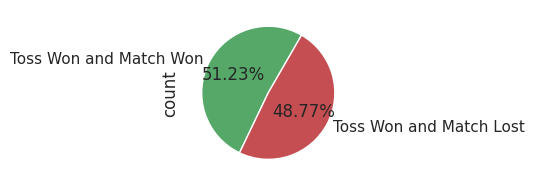

In [204]:
#Visualization
plt.figure(figsize =  (5,5))
toss_outcome_counts = matches_df['toss_winner_won'].value_counts()
toss_outcome_counts.index = ['Toss Won and Match Won', 'Toss Won and Match Lost']
toss_outcome_counts.plot(kind = 'pie',autopct='%.2f%%', startangle = 60, colors=['g','r'])
plt.tight_layout()
plt.show()

In [205]:
# Question 9 How many times has the chasing team won the match?

#**✅ Key Logic:**

**🏏 Toss Decision Determines the Batting Order:**

    If the toss winner chooses to field → the toss winner is the chasing team.

    If the toss winner chooses to bat → the toss loser is the chasing team.

**✅ Chasing Team Wins When:**

  **Toss decision is 'field'**

    👉 The toss winner is the chasing team.
    👉 If toss winner = match winner → chasing team won.

  **Toss decision is 'bat'**

    👉 The toss loser is the chasing team.
    👉 If toss winner ≠ match winner → chasing team won.

In [206]:
# Drop matches without a result
matches_df_clean = matches_df.dropna(subset=['winner'])

# Chasing team wins when:
# - toss_winner chose to field AND toss_winner == winner
# - OR toss_winner chose to bat AND toss_winner != winner

chasing_win_condition = (
    ((matches_df_clean['toss_decision'] == 'field') & (matches_df_clean['toss_winner'] == matches_df_clean['winner'])) |
    ((matches_df_clean['toss_decision'] == 'bat') & (matches_df_clean['toss_winner'] != matches_df_clean['winner']))
)

# Count chasing wins
chasing_wins = chasing_win_condition.sum()

total_matches = matches_df_clean.shape[0]

# Output
print(f"✅ Chasing team won {chasing_wins} out of {total_matches} matches.")
print(f"📊 Win percentage while chasing: {round((chasing_wins / total_matches) * 100, 2)}%")


✅ Chasing team won 448 out of 816 matches.
📊 Win percentage while chasing: 54.9%


In [207]:
# Question 10 Which all teams had won this tournament?

In [208]:
# Sort by date to ensure final match is last
matches_df_sorted = matches_df.sort_values(['season', 'date'])

# Get final match of each season
final_matches = matches_df_sorted.groupby('season').tail(1)

#tournament_winners = final_matches.value_count()
#tournament_winners.index

# Get season-wise IPL champions
champions = final_matches[['season', 'winner']].reset_index(drop=True)

# Display result
print("🏆 IPL Winners by Season:")
print(champions)

trophy_counts = champions['winner'].value_counts()
print("\n🏆Number of Trophies per Team:")
print(trophy_counts)


🏆 IPL Winners by Season:
    season                 winner
0     2008       Rajasthan Royals
1     2009        Deccan Chargers
2     2010    Chennai Super Kings
3     2011    Chennai Super Kings
4     2012  Kolkata Knight Riders
5     2013         Mumbai Indians
6     2014  Kolkata Knight Riders
7     2015         Mumbai Indians
8     2016    Sunrisers Hyderabad
9     2017         Mumbai Indians
10    2018    Chennai Super Kings
11    2019         Mumbai Indians
12    2020         Mumbai Indians

🏆Number of Trophies per Team:
winner
Mumbai Indians           5
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: count, dtype: int64


In [209]:
# Question 11 Which team has played the most number of matches?

#**✅ Key Logic:**

Each match has two teams: team1 and team2.

To find the total matches played by each team, we need to:

    Count how many times each team appears in team1.

    Count how many times each team appears in team2.

Sum both counts → this gives total matches played by each team.

In [210]:
# Count how many times each team appears in 'team1' and 'team2'
team1_counts = matches_df['team1'].value_counts()
team2_counts = matches_df['team2'].value_counts()

# Add both counts to get total matches played by each team
total_matches_played = team1_counts.add(team2_counts, fill_value=0).sort_values(ascending=False)

# Display the team with most matches
print("Total Matches Played by Each Team:")
print(total_matches_played)

# Display top team
top_team = total_matches_played.idxmax()
top_team_matches = total_matches_played.max()
print(f"\nTeam with the most matches: {top_team} ({top_team_matches} matches)")

Total Matches Played by Each Team:
Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Rajasthan Royals               161
Delhi Daredevils               161
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   46
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

Team with the most matches: Mumbai Indians (203 matches)


In [211]:
# Question 12	Which team has won the most number of times?

In [212]:
# Count how many times each team appears as the winner
team_wins = matches_df['winner'].value_counts().sort_values(ascending=False)

# Display top 10 teams with most wins
print("🏆 Total Wins by Each Team:")
print(team_wins)

# Display top team
top_team = team_wins.idxmax()
top_wins = team_wins.max()
print(f"\nTeam with the most wins: {top_team} ({top_wins} wins)")

🏆 Total Wins by Each Team:
winner
Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
No Winner                        4
Name: count, dtype: int64

Team with the most wins: Mumbai Indians (120 wins)


In [213]:
# Question 13 Which team has the highest winning percentage?

#**✅ Key Formula:**

**Winning Percentage** = (Total Wins / Total Matches Played) × 100

**📦 Required:**

Total matches played by each team. ✅ (from Question 11)

Total wins by each team. ✅ (from Question 12)



In [214]:
# Calculate winning percentage for each team
winning_percent = round((team_wins/total_matches_played)*100,2).sort_values(ascending=False)

# Display the highest winning percentage team
top_team = winning_percent.idxmax()
top_percentage = winning_percent.max()

print("Winning Percentage of Each Team:")
print(winning_percent)
print(f"\nTeam with the highest winning percentage: {top_team} ({top_percentage:.2f}%)")

Winning Percentage of Each Team:
Rising Pune Supergiant         62.50
Chennai Super Kings            59.55
Mumbai Indians                 59.11
Delhi Capitals                 57.58
Sunrisers Hyderabad            53.23
Kolkata Knight Riders          51.56
Rajasthan Royals               50.31
Royal Challengers Bangalore    46.67
Kings XI Punjab                46.32
Gujarat Lions                  43.33
Kochi Tuskers Kerala           42.86
Delhi Daredevils               41.61
Deccan Chargers                38.67
Rising Pune Supergiants        35.71
Pune Warriors                  26.09
No Winner                        NaN
Name: count, dtype: float64

Team with the highest winning percentage: Rising Pune Supergiant (62.50%)


In [215]:
# Question 14 Is there any lucky venue for a particular team?

In [216]:
# Count number of wins per team per venue
venue_wins = matches_df.groupby(['winner', 'venue']).size().reset_index(name='win_count')

# For each team, get the venue with most wins
lucky_venues = venue_wins.sort_values(['win_count'], ascending=[False])

lucky_venues_per_team = lucky_venues.groupby('winner').first().sort_values('win_count', ascending=False).reset_index()

# Display lucky venue for each team
print("🍀 Lucky Venue for Each Team (Most Wins):")
print(lucky_venues_per_team)

🍀 Lucky Venue for Each Team (Most Wins):
                         winner  \
0         Kolkata Knight Riders   
1                Mumbai Indians   
2           Chennai Super Kings   
3              Rajasthan Royals   
4           Sunrisers Hyderabad   
5   Royal Challengers Bangalore   
6              Delhi Daredevils   
7               Kings XI Punjab   
8        Rising Pune Supergiant   
9                 Pune Warriors   
10               Delhi Capitals   
11              Deccan Chargers   
12                Gujarat Lions   
13         Kochi Tuskers Kerala   
14                    No Winner   
15      Rising Pune Supergiants   

                                                venue  win_count  
0                                        Eden Gardens         45  
1                                    Wankhede Stadium         42  
2                     MA Chidambaram Stadium, Chepauk         40  
3                              Sawai Mansingh Stadium         32  
4           Rajiv Gandhi Int

In [217]:
# Question 15 Innings wise comparison between teams

In [218]:
# Merge matches to get team and season info
balls_merged = balls_df.merge(matches_df[['id', 'season']], on='id')

# Group by team and innings, then sum runs
innings_comparison = balls_merged.groupby(['batting_team', 'inning'])['total_runs'].sum().unstack().fillna(0)

# Rename columns for clarity
innings_comparison.columns = ['1st Innings Runs', '2nd Innings Runs']

# Round and sort
innings_comparison = innings_comparison.round(2).sort_values(by='1st Innings Runs', ascending=False)

# Display result
print("🏏 Innings-wise Run Comparison Between Teams:")
print(innings_comparison)

🏏 Innings-wise Run Comparison Between Teams:
                             1st Innings Runs  2nd Innings Runs
batting_team                                                   
Mumbai Indians                          18338             13948
Royal Challengers Bangalore             15774             14440
Kings XI Punjab                         15710             14307
Chennai Super Kings                     15344             13019
Kolkata Knight Riders                   14842             14541
Sunrisers Hyderabad                     11277              8055
Delhi Daredevils                        11247             13038
Rajasthan Royals                        11236             13271
Deccan Chargers                          6765              4698
Pune Warriors                            2973              3385
Delhi Capitals                           2860              2436
Gujarat Lions                            2267              2589
Rising Pune Supergiant                   1304              

In [219]:
# Question 16 Which team has scored the most number of 200+ scores?

In [220]:
# Sum total runs per match per team per innings
innings_totals_scored = balls_df.groupby(['id', 'batting_team', 'inning'])['total_runs'].sum()

# Filter innings where runs >= 200
high_scores = innings_totals_scored[innings_totals_scored >= 200]

# Count how many times each team did it
team_200_plus = high_scores.reset_index().groupby('batting_team').size().sort_values(ascending=False)
team_200_plus

,0
batting_team,
Royal Challengers Bangalore,19
Chennai Super Kings,17
Kings XI Punjab,14
Mumbai Indians,14
Kolkata Knight Riders,12
Sunrisers Hyderabad,12
Rajasthan Royals,9
Delhi Daredevils,5
Delhi Capitals,2


In [221]:
# Question 17 Which team has conceded 200+ scores the most?

In [222]:
# Step 1: Calculate total runs conceded in each match-innings by bowling team
innings_totals_conceded = balls_df.groupby(['id', 'bowling_team', 'inning'])['total_runs'].sum()

# Step 2: Filter innings with 200+ runs
high_scores_against = innings_totals_conceded[innings_totals_conceded >= 200]

# Step 3: Count how many times each bowling_team conceded 200+
conceded_200_plus = high_scores_against.reset_index().groupby('bowling_team').size().sort_values(ascending=False)

print(conceded_200_plus)

bowling_team
Kings XI Punjab                20
Royal Challengers Bangalore    17
Chennai Super Kings            12
Delhi Daredevils               11
Kolkata Knight Riders          10
Rajasthan Royals               10
Mumbai Indians                  8
Sunrisers Hyderabad             7
Delhi Capitals                  3
Gujarat Lions                   3
Deccan Chargers                 2
Pune Warriors                   1
Rising Pune Supergiant          1
Unknown Bowling Team            1
dtype: int64


In [223]:
# Question 18 What was the highest run scored by a team in a single match?

In [224]:
# Group by match ID, batting team, and inning to get total score
team_match_runs = balls_df.groupby(['id', 'batting_team', 'inning'])['total_runs'].sum().reset_index()

# Sort to find the highest team score in a single match
highest_score = team_match_runs.sort_values(by='total_runs', ascending=False).head(1)
print(highest_score)

         id                 batting_team  inning  total_runs
702  598027  Royal Challengers Bangalore       1         263


In [225]:
# Question 19 Which is the biggest win in terms of run margin?

In [226]:
# Filter matches won by runs (not wickets)
run_wins = matches_df[matches_df['result']=='runs'].sort_values(by='result_margin', ascending=False)

# Display result
print("🚨 Biggest Win by Run Margin:")
print(run_wins[['winner', 'result_margin']])


🚨 Biggest Win by Run Margin:
                          winner result_margin
620               Mumbai Indians         146.0
560  Royal Challengers Bangalore         144.0
0          Kolkata Knight Riders         140.0
497  Royal Challengers Bangalore         138.0
351  Royal Challengers Bangalore         130.0
..                           ...           ...
734  Royal Challengers Bangalore           1.0
635               Mumbai Indians           1.0
291               Mumbai Indians           1.0
539                Gujarat Lions           1.0
46               Kings XI Punjab           1.0

[364 rows x 2 columns]


In [227]:
# Queston 20 Which batsmen have played the most number of balls?

In [228]:
# Group by batsman and count the number of deliveries faced
balls_faced = balls_df.groupby('batsman').count()['ball'].reset_index().rename(columns={'ball': 'balls_faced'})

# Sort the batsmen by number of balls faced in descending order
most_balls_faced = balls_faced.sort_values(by='balls_faced', ascending=False)

print("Top 10 Batsmen Who Played the Most Balls:")
print(most_balls_faced.head(10))

# Get the batsman who faced the most balls
top_batsman_row = balls_faced.loc[balls_faced['balls_faced'].idxmax()]

# Extract batsman's name and balls faced
top_batsman_name = top_batsman_row['batsman']
total_balls_faced = top_batsman_row['balls_faced']

print(f"Top Batsman: {top_batsman_name} with {total_balls_faced} balls faced.")


Top 10 Batsmen Who Played the Most Balls:
        batsman  balls_faced
505     V Kohli         4609
407    S Dhawan         4208
379   RG Sharma         4088
438    SK Raina         4041
116   DA Warner         3819
398  RV Uthappa         3658
154   G Gambhir         3524
301    MS Dhoni         3493
96     CH Gayle         3342
42    AM Rahane         3325
Top Batsman: V Kohli with 4609 balls faced.


In [229]:
# Question 21 - Who are the leading run-scorers of all time?

In [230]:
# Group by batsman and sum the batsman runs
batsman_runs = balls_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
batsman_runs.head(10)

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
AB de Villiers,4849
CH Gayle,4772
MS Dhoni,4632
RV Uthappa,4607


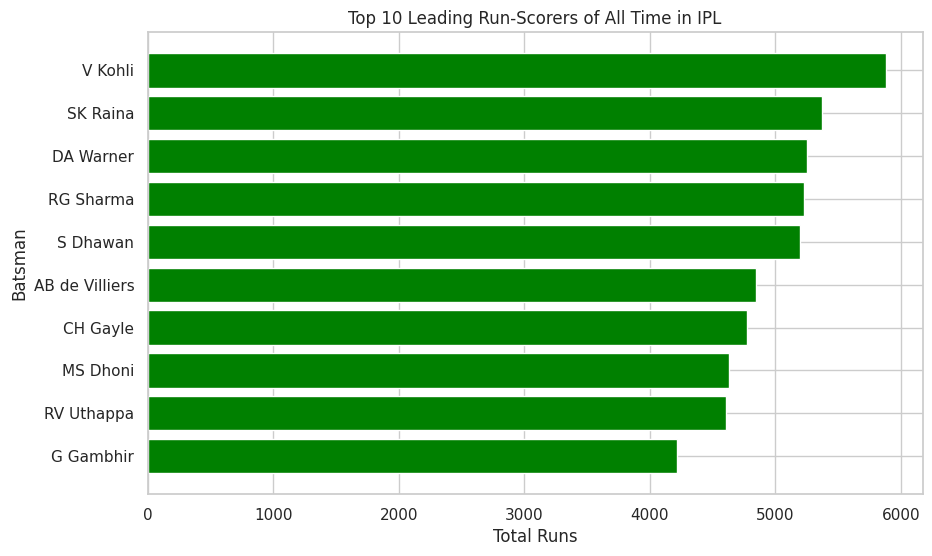

In [231]:
# Visualization

# Get the top 10 run-scorers
top_10_batsmen = batsman_runs.head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_batsmen.index[::-1], top_10_batsmen.values[::-1], color='green')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.title('Top 10 Leading Run-Scorers of All Time in IPL')
plt.show()

In [232]:
# Question 22 - Who has hit the most number of 4's?
# Merge balls and matches datasets to get the season for each delivery
merged_df = balls_df.merge(matches_df[['id', 'season']], left_on='id', right_on='id', how='left')

fours_df = merged_df[((balls_df['batsman_runs'] == 4)|(balls_df['batsman_runs'] == 5)) & (balls_df['non_boundary'] == 0)]['batsman'].value_counts()
fours_df.head(1)
fours_df.head(1).index


Index(['S Dhawan'], dtype='object', name='batsman')

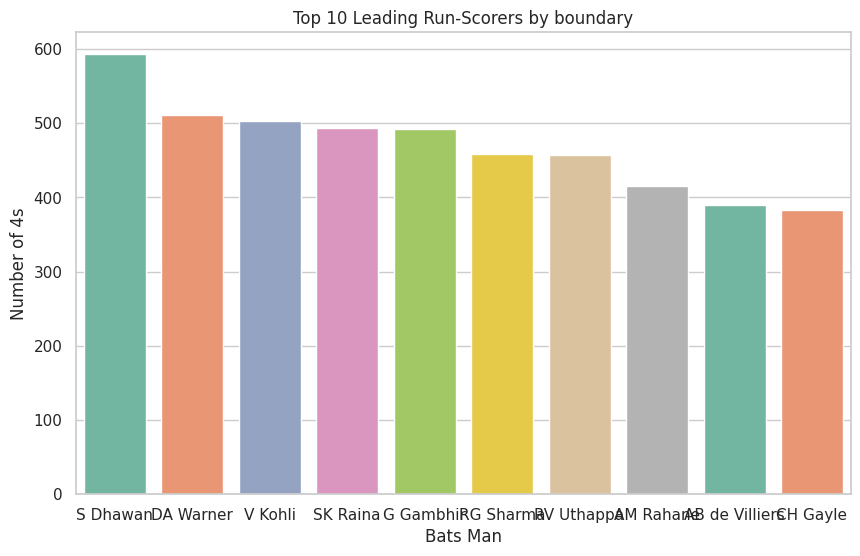

In [233]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=fours_df.index[:10], y=fours_df.values[:10], palette='Set2')
plt.xlabel('Bats Man')
plt.ylabel('Number of 4s')
plt.title('Top 10 Leading Run-Scorers by boundary')
plt.show()

In [234]:
# Question 23 Who has hit the most number of 6's?
sixes_df = balls_df[((balls_df['batsman_runs'] == 6)|(balls_df['batsman_runs'] == 7)) & (balls_df['non_boundary'] == 0)]['batsman'].value_counts()
sixes_df.head(1)
sixes_df.head(1).index

Index(['CH Gayle'], dtype='object', name='batsman')

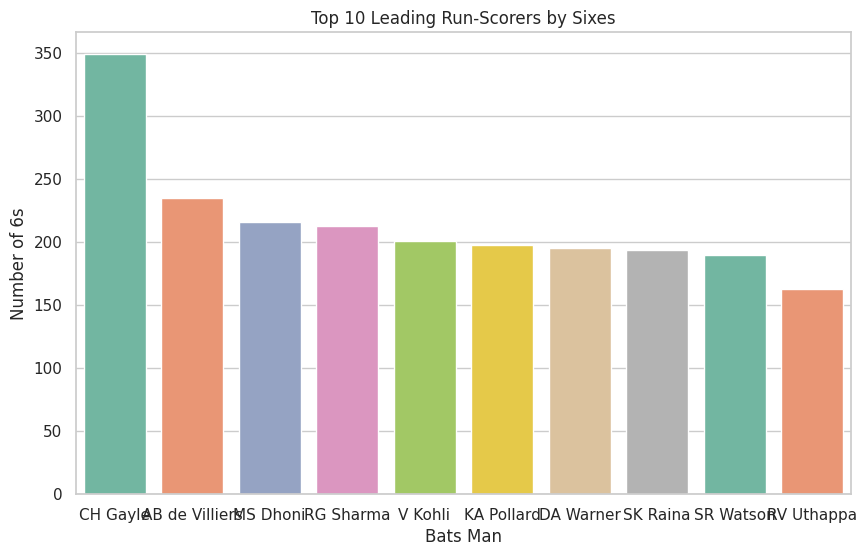

In [235]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=sixes_df.index[:10], y=sixes_df.values[:10], palette='Set2')
plt.xlabel('Bats Man')
plt.ylabel('Number of 6s')
plt.title('Top 10 Leading Run-Scorers by Sixes')
plt.show()

In [236]:
# Question 24 Who has the highest strike rate?
# Calculate total runs scored by each batsman
batsman_runs = balls_df.groupby('batsman')['batsman_runs'].sum().reset_index()

# Calculate total balls faced by each batsman
balls_faced = balls_df.groupby('batsman')['ball'].count().reset_index().rename(columns={'ball': 'balls_faced'})

# Merge the two datasets
batsman_stats = pd.merge(batsman_runs, balls_faced, on='batsman')

batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['balls_faced']) * 100

# Sort by strike rate
top_strike_rates = batsman_stats.sort_values(by='strike_rate', ascending=False)

# Display the top 10 batsmen with the highest strike rates
print("Top 10 Batsmen with the Highest Strike Rates (Min 200 balls faced):")
print(top_strike_rates.head(10))

Top 10 Batsmen with the Highest Strike Rates (Min 200 balls faced):
             batsman  batsman_runs  balls_faced  strike_rate
72        B Stanlake             5            2   250.000000
504         Umar Gul            39           19   205.263158
395         RS Sodhi             4            2   200.000000
470    Shahid Afridi            81           46   176.086957
175       I Malhotra             7            4   175.000000
498     TU Deshpande            21           12   175.000000
33        AD Russell          1517          882   171.995465
253        LJ Wright           106           63   168.253968
57       Abdul Samad           111           66   168.181818
235  KMDN Kulasekara             5            3   166.666667


In [237]:
# Question 25 Who is the leading wicket-taker?
# Filter out deliveries where a dismissal has occurred (non-null dismissal_kind and excluding run outs)
wickets_df = balls_df[(balls_df['is_wicket']==1) & (balls_df['dismissal_kind'] != 'run out') & (balls_df['dismissal_kind'] != 'No Dismissal Kind')]

# Count the number of wickets per bowler
# Count the number of wickets per bowler
wicket_takers = wickets_df.groupby('bowler')['dismissal_kind'].count().reset_index().rename(columns={'dismissal_kind': 'wickets'})

# Sort to get the leading wicket-takers
wicket_takers = wicket_takers.sort_values(by='wickets', ascending=False)

# Display the top 10 leading wicket-takers
print("Top 10 Leading Wicket-Takers in IPL:")
print(wicket_takers.head(10))


Top 10 Leading Wicket-Takers in IPL:
              bowler  wickets
297       SL Malinga      170
5           A Mishra      160
235        PP Chawla      156
85          DJ Bravo      153
115  Harbhajan Singh      150
240         R Ashwin      138
50           B Kumar      136
304        SP Narine      127
357        YS Chahal      121
338         UT Yadav      119


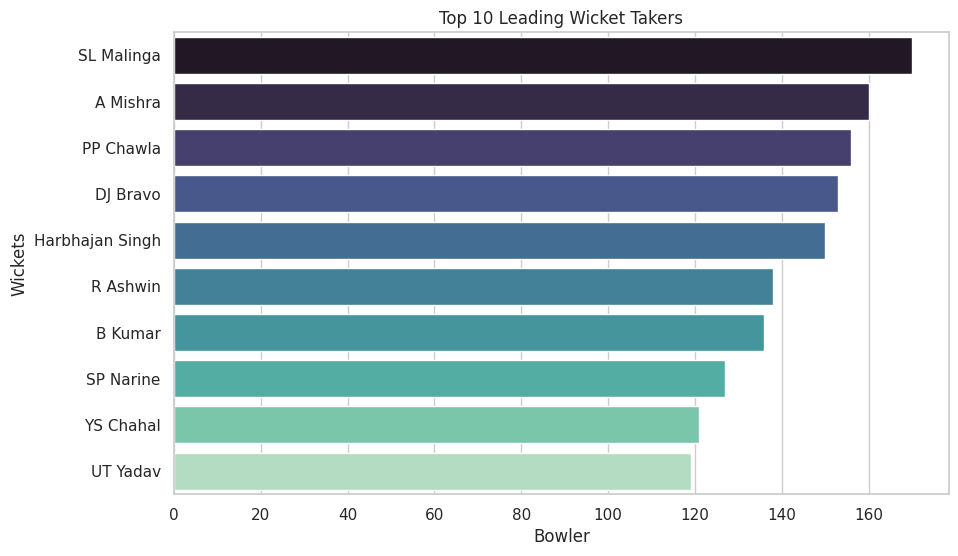

In [238]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=wicket_takers.head(10), x='wickets', y='bowler', palette='mako')
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.title('Top 10 Leading Wicket Takers')
plt.show()

In [239]:
# Question 26 Which stadium has hosted the most number of matches?
# Count the number of matches at each venue
stadium_counts = matches_df['venue'].value_counts()
stadium_counts.columns = ['stadium', 'matches_hosted']

# Display the top stadiums
print("Stadiums Hosting the Most Number of Matches:")
print(stadium_counts.head(10))

Stadiums Hosting the Most Number of Matches:
venue
Eden Gardens                                  77
Feroz Shah Kotla                              74
Wankhede Stadium                              73
M Chinnaswamy Stadium                         65
Rajiv Gandhi International Stadium, Uppal     64
MA Chidambaram Stadium, Chepauk               57
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Dubai International Cricket Stadium           33
Sheikh Zayed Stadium                          29
Name: count, dtype: int64


In [240]:
'''# Visualizatio
# Plot top stadiums
plt.figure(figsize=(12, 6))
sns.barplot( x = stadium_counts.index[:10], y=stadium_counts.value[:10], palette='cubehelix')

plt.xlabel('Number of Matches Hosted')
plt.ylabel('Stadium')
plt.title('Top Stadiums by Number of Matches Hosted in IPL')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
'''


"# Visualizatio\n# Plot top stadiums\nplt.figure(figsize=(12, 6))\nsns.barplot( x = stadium_counts.index[:10], y=stadium_counts.value[:10], palette='cubehelix')\n\nplt.xlabel('Number of Matches Hosted')\nplt.ylabel('Stadium')\nplt.title('Top Stadiums by Number of Matches Hosted in IPL')\nplt.grid(axis='x', linestyle='--', alpha=0.7)\nplt.show()\n"

In [241]:
# Question 27 Who has won the most MOM awards?

# Count the number of Man of the Match awards per player
mom_awards = matches_df['player_of_match'].value_counts()
mom_awards.columns = ['player', 'mom_awards']

# Display the top 10 players with the most MOM awards
print("Top 10 Players with the Most Man of the Match Awards:")
print(mom_awards.head(10))

Top 10 Players with the Most Man of the Match Awards:
player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         16
SK Raina          14
G Gambhir         13
V Kohli           13
Name: count, dtype: int64


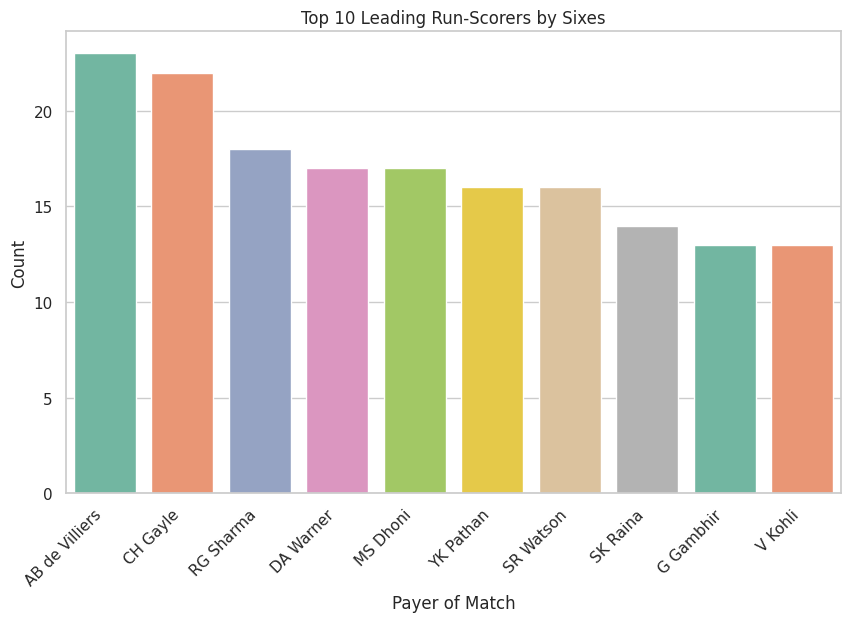

In [242]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x = mom_awards.index[:10], y=mom_awards.values[:10], palette='Set2')
plt.xlabel('Payer of Match')
plt.ylabel('Count')
plt.title('Top 10 Players with the Most Man of the Match Awards')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Leading Run-Scorers by Sixes')
plt.show()

In [243]:
# Question 28 What is the count of fours hit in each season?
# Merge balls and matches datasets to get the season for each delivery
merged_df = balls_df.merge(matches_df[['id', 'season']], left_on='id', right_on='id', how='left')

# Filter for all deliveries where 4's were hit
fours_df = merged_df[merged_df['batsman_runs'] == 4]

# Group by season and count the number of 4's
fours_per_season = fours_df.groupby('season').count()['batsman_runs']

# Display the count of 4's per season
print("Count of Fours Hit in Each Season:")
print(fours_per_season)

Count of Fours Hit in Each Season:
season
2008    1703
2009    1317
2010    1708
2011    1916
2012    1911
2013    2052
2014    1562
2015    1607
2016    1633
2017    1611
2018    1652
2019    1653
2020    1583
Name: batsman_runs, dtype: int64


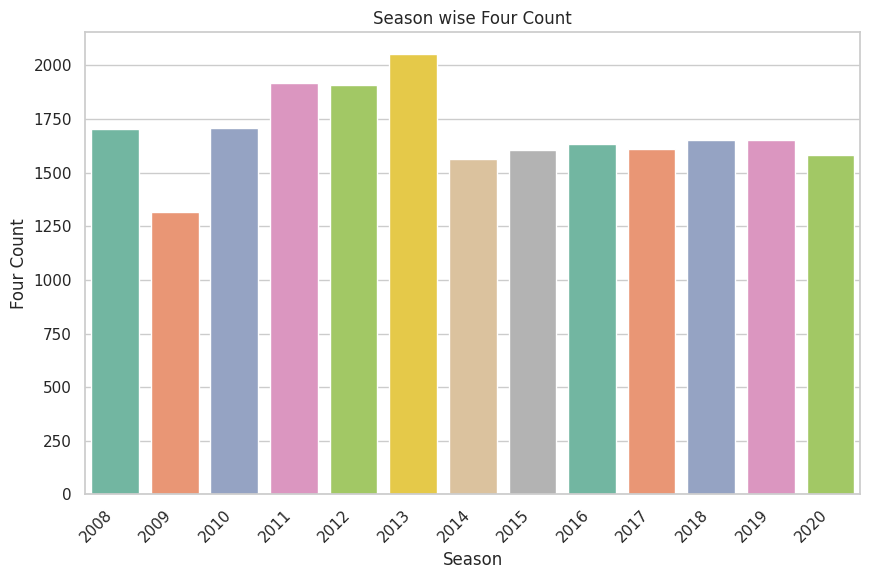

In [244]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x = fours_per_season.index, y=fours_per_season.values, palette='Set2')
plt.xlabel('Season')
plt.ylabel('Four Count')
plt.title('Season wise Four Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [245]:
# Question 29 What is the count of sixes hit in each season?
# Merge balls and matches datasets to get the season for each delivery
merged_df = balls_df.merge(matches_df[['id', 'season']], left_on='id', right_on='id', how='left')

# Filter for all deliveries where 4's were hit
sixes_df = merged_df[merged_df['batsman_runs'] == 6]

# Group by season and count the number of 4's
sixes_per_season = sixes_df.groupby('season').count()['batsman_runs']

# Display the count of 4's per season
print("Count of Sixes Hit in Each Season:")
print(sixes_per_season)

Count of Sixes Hit in Each Season:
season
2008    623
2009    506
2010    585
2011    639
2012    733
2013    675
2014    714
2015    692
2016    639
2017    705
2018    872
2019    784
2020    735
Name: batsman_runs, dtype: int64


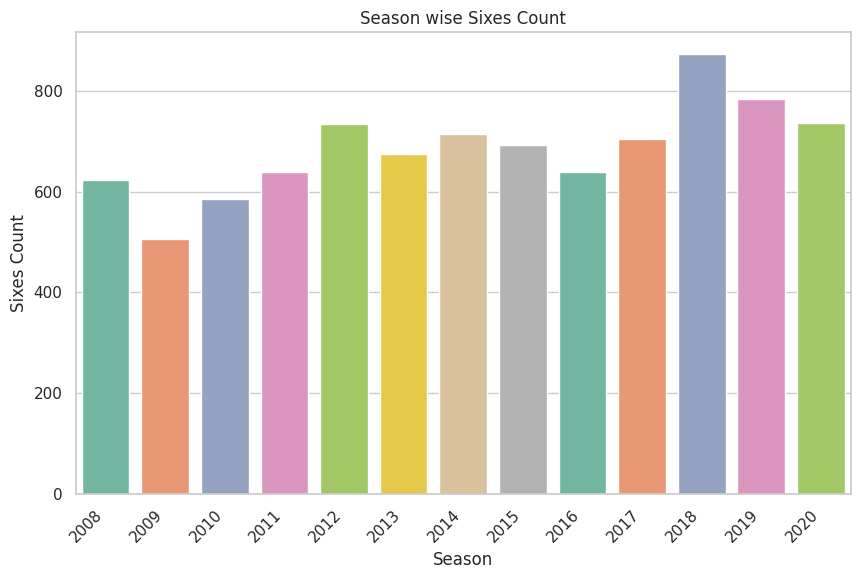

In [246]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x = sixes_per_season.index, y=sixes_per_season.values, palette='Set2')
plt.xlabel('Season')
plt.ylabel('Sixes Count')
plt.title('Season wise Sixes Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [247]:
# Question 30 What is the count of runs scored from boundaries in each season?
# Filter for all boundaries (4's and 6's)
boundaries_df = merged_df[merged_df['batsman_runs'].isin([4, 6])]

# Calculate total runs from boundaries per season
boundary_runs_per_season = boundaries_df.groupby('season')['batsman_runs'].sum()

# Display the total boundary runs per season
print("Runs Scored from Boundaries in Each Season:")
print(boundary_runs_per_season)

Runs Scored from Boundaries in Each Season:
season
2008    10550
2009     8304
2010    10342
2011    11498
2012    12042
2013    12258
2014    10532
2015    10580
2016    10366
2017    10674
2018    11840
2019    11316
2020    10742
Name: batsman_runs, dtype: int64


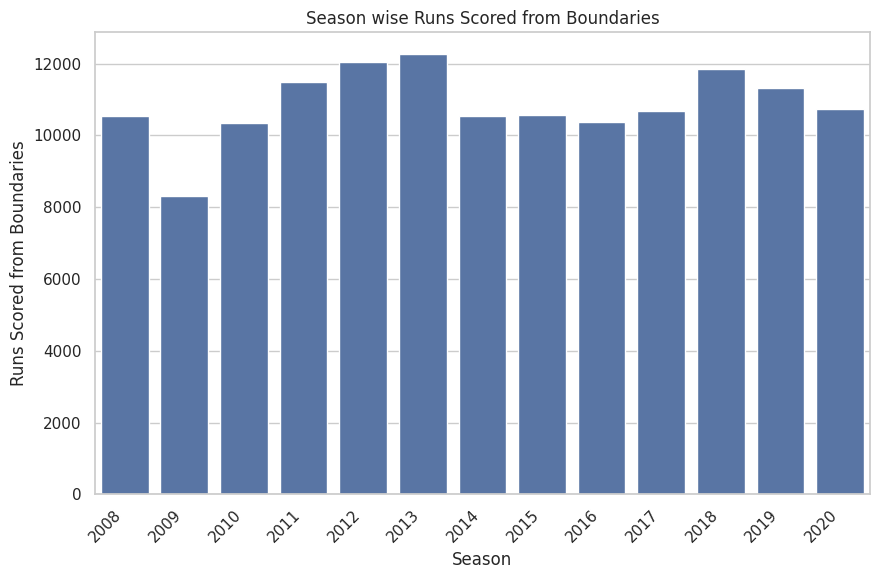

In [248]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x = boundary_runs_per_season.index, y=boundary_runs_per_season.values)
plt.xlabel('Season')
plt.ylabel('Runs Scored from Boundaries')
plt.title('Season wise Runs Scored from Boundaries')
plt.xticks(rotation=45, ha='right')
plt.show()

In [249]:
# Question 31 What is the run contribution from boundaries in each season?
total_runs_per_season = merged_df.groupby('season')['batsman_runs'].sum()
boundary_contribution_pct = round((boundary_runs_per_season / total_runs_per_season) * 100,2)

# Display the run contribution from boundaries per season
print("Run Contribution from Boundaries in Each Season:")
print(boundary_contribution_pct)

Run Contribution from Boundaries in Each Season:
season
2008    62.76
2009    54.12
2010    58.31
2011    57.70
2012    56.47
2013    57.21
2014    58.77
2015    60.77
2016    57.71
2017    59.61
2018    62.00
2019    60.93
2020    58.04
Name: batsman_runs, dtype: float64


In [250]:
# Question 32 Which team has scored the most runs in the first 6 overs?
# Filter for deliveries in the first 6 overs (overs numbered 0 to 5)
powerplay_df = balls_df[balls_df['over'] < 6]

# Group by batting team and sum the runs scored
powerplay_runs = powerplay_df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Display the teams
print("Teams with the Most Runs in the First 6 Overs (Powerplay):")
print(powerplay_runs)

Teams with the Most Runs in the First 6 Overs (Powerplay):
batting_team
Mumbai Indians                 9204
Kings XI Punjab                8907
Kolkata Knight Riders          8871
Royal Challengers Bangalore    8699
Chennai Super Kings            8048
Delhi Daredevils               7349
Rajasthan Royals               7151
Sunrisers Hyderabad            5917
Deccan Chargers                3417
Pune Warriors                  1895
Delhi Capitals                 1560
Gujarat Lions                  1553
Rising Pune Supergiant          785
Kochi Tuskers Kerala            680
Rising Pune Supergiants         638
Name: total_runs, dtype: int64


In [251]:
# Question 33 Which team has scored the most runs in the last 4 overs?
# Filter for deliveries in the last 4 overs (overs 16 to 19 → 0-indexed)
death_overs_df = balls_df[balls_df['over'] >= 16]

# Group by batting team and sum the total runs
death_overs_runs = death_overs_df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Display the teams
print("Teams with the Most Runs in the Last 4 Overs (Death Overs):")
print(death_overs_runs)

Teams with the Most Runs in the Last 4 Overs (Death Overs):
batting_team
Mumbai Indians                 7538
Royal Challengers Bangalore    6787
Chennai Super Kings            6655
Kings XI Punjab                6227
Kolkata Knight Riders          6224
Rajasthan Royals               5043
Delhi Daredevils               5043
Sunrisers Hyderabad            4155
Deccan Chargers                2539
Pune Warriors                  1360
Delhi Capitals                 1160
Gujarat Lions                   921
Rising Pune Supergiant          555
Rising Pune Supergiants         443
Kochi Tuskers Kerala            337
Name: total_runs, dtype: int64


In [252]:
# Question 34 Which team has the best scoring run-rate in the first 6 overs?
# Total number of balls faced in powerplay per team
powerplay_balls = powerplay_df.groupby('batting_team').count()['ball']

# Calculate run rate: (total runs / total balls) * 6
powerplay_run_rate = round(((powerplay_runs / powerplay_balls) * 6),2).sort_values(ascending=False)

# Display the best powerplay run rates
print("Powerplay Run Rates (Runs per Over) by Team:")
print(powerplay_run_rate)

Powerplay Run Rates (Runs per Over) by Team:
batting_team
Gujarat Lions                  8.34
Rising Pune Supergiant         7.88
Sunrisers Hyderabad            7.66
Kochi Tuskers Kerala           7.65
Delhi Capitals                 7.63
Kings XI Punjab                7.52
Kolkata Knight Riders          7.40
Rising Pune Supergiants        7.33
Delhi Daredevils               7.32
Chennai Super Kings            7.28
Deccan Chargers                7.27
Mumbai Indians                 7.22
Rajasthan Royals               7.22
Royal Challengers Bangalore    7.20
Pune Warriors                  6.77
dtype: float64


In [253]:
# Question 35 Which team has the best scoring run-rate in the last 4 overs?
# Total number of balls faced in deathover per team
death_overs_balls = death_overs_df.groupby('batting_team').count()['ball']

# Calculate run rate: (total runs / total balls) * 6
death_overs_run_rate = round(((death_overs_runs /death_overs_balls) * 6),2).sort_values(ascending=False)

# Display the best powerplay run rates
print("Death Overs Run Rates (Runs per Over) by Team:")
print(death_overs_run_rate)


Death Overs Run Rates (Runs per Over) by Team:
batting_team
Rising Pune Supergiants        10.38
Royal Challengers Bangalore    10.27
Chennai Super Kings            10.12
Mumbai Indians                 10.12
Kolkata Knight Riders           9.62
Delhi Daredevils                9.61
Rising Pune Supergiant          9.57
Delhi Capitals                  9.37
Sunrisers Hyderabad             9.28
Kings XI Punjab                 9.22
Rajasthan Royals                9.20
Deccan Chargers                 9.18
Gujarat Lions                   9.01
Kochi Tuskers Kerala            8.50
Pune Warriors                   8.10
dtype: float64
